Set the path to data

In [ ]:
PL=/davidData/data/course/kenyaWorkshop/anders/structure_day3/blue_wildebeest_thin

We will use Plink v1.9 (https://www.cog-genomics.org/plink/) for estimating runs of homozygosity

In [ ]:
plink --bfile $PL --chr-set 29  --make-bed --homozyg --homozyg-window-het 3 --homozyg-window-missing 20 --out wildebeest_ROH --geno 0.01 --maf 0.1


## Exercise
What do the various settings in plink mean?

Dowload the R script needed for plotting results.
Script written by Anders Albrechtsen, Xiaodong Liu and Shixu He

In [ ]:
wget https://raw.githubusercontent.com/popgenDK/ROH/main/plotPlinkROH.R

Plot the estimated ROH for individual CTauKeS__701 from East Amboseli

In [ ]:
Rscript plotPlinkROH.R -p wildebeest_ROH.bed -s CTauKeS__701 --homfile wildebeest_ROH.hom

## Exercise
Plot the estimated ROH for individual CTauKeS__709 from East Narobi

## Exercise
Plot the estimated ROH for individual CTauKeW__638 from West Serengeti

Estimate the average genome in ROH in various populations

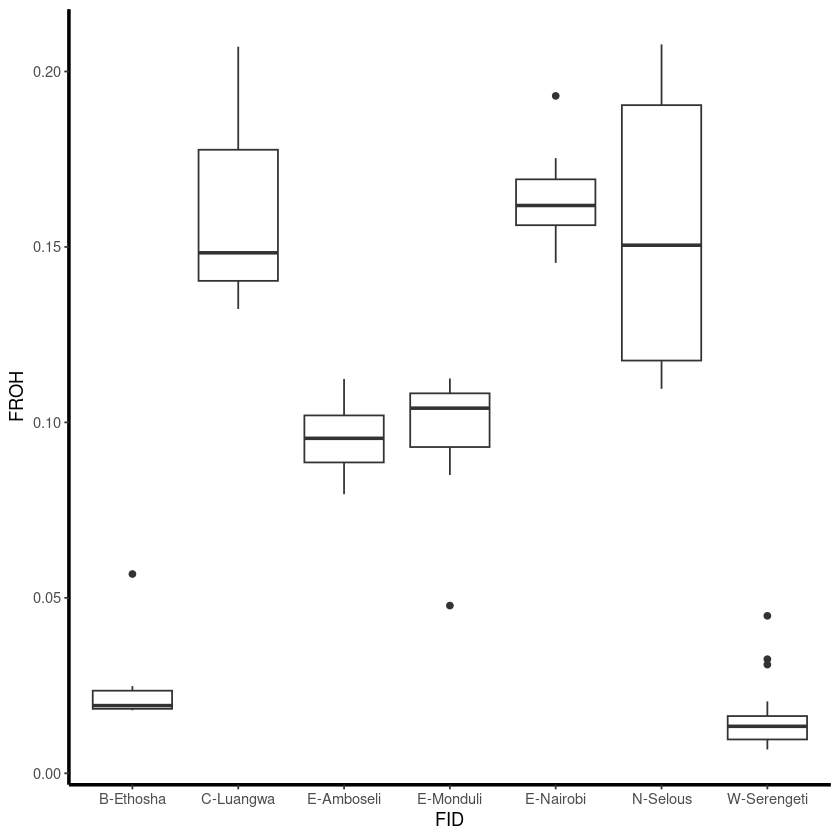

In [8]:
library('ggplot2')
total_ROH <- read.table('wildebeest_ROH.hom.indiv', header=T)
autosomal_genome_size = 2000000

ggplot(total_ROH, aes(x=FID, y=KB/autosomal_genome_size)) + 
  geom_boxplot()+ylab('FROH')+
theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black", linewidth = 1))


Visualize the distribution of inbreeding in various populations. Script by Anders Albrechtsen

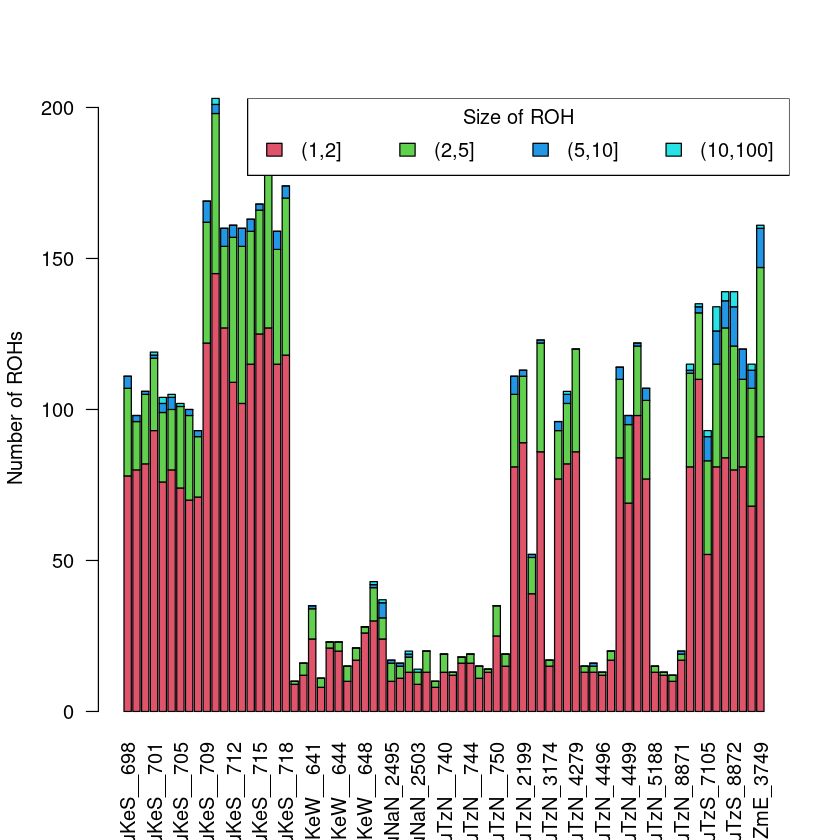

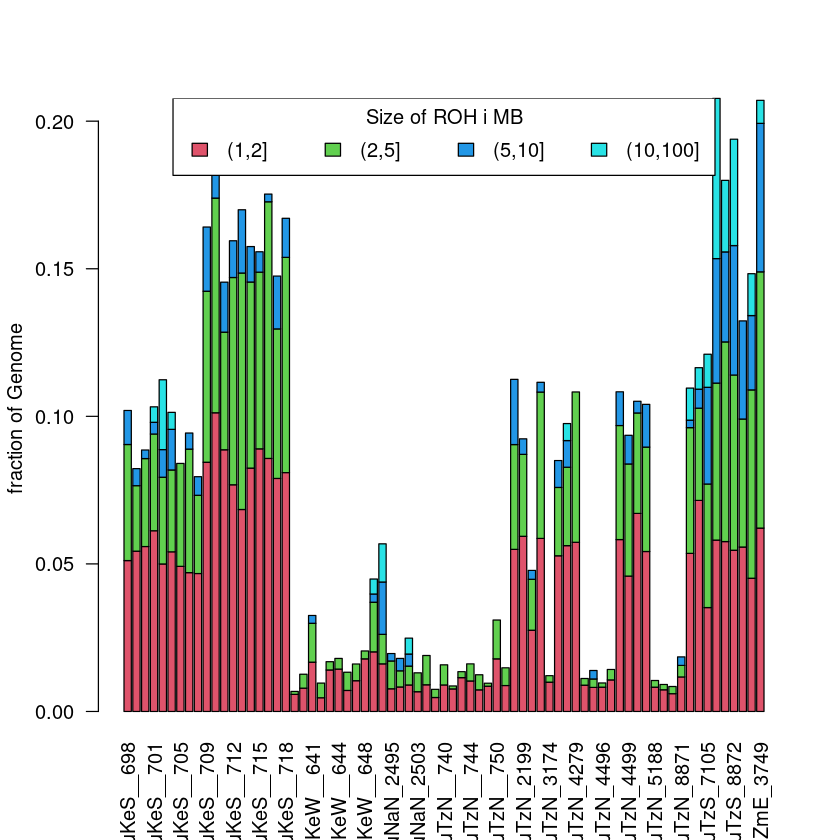

In [21]:
hom <- read.table("wildebeest_ROH.hom",head=T)
hom <- subset(hom,KB>100)
tab <- tapply(hom$KB/1e3,hom$IID,function(x) table(cut(x,c(1e6,2e6,5e6,1e7,1e8)/1e6)))

res <- do.call(rbind,tab)
barplot(t(res),col=1:7+1,las=2,ylab="Number of ROHs")
legend("topright",fill=1:length(tab[[1]])+1,legend=names(tab[[1]]),hor=T,title="Size of ROH")



tab2 <- tapply(hom$KB/1e3,hom$IID,function(x) tapply(x,cut(x,c(1e6,2e6,5e6,1e7,1e8)/1e6),sum))

res2 <- do.call(rbind,tab2)
barplot(t(res2)/2e3,col=1:7+1,las=2,ylab="fraction of Genome")
legend("top",fill=1:length(tab2[[1]])+1,legend=names(tab2[[1]]),hor=T,title="Size of ROH i MB")

## Exercise
Which population needs more protection based on inbreeding values?

## Exercise
Which population has lower inbreeding and why?

## Exercise
How inbred are wildebeest compared to other Alcelaphines like Hirola or Hartebeest or Topi or Blesbocks?